For some actions, you may want to require human approval before running to ensure that everything is running as intended.

In [1]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_openai import ChatOpenAI
#Initializing the language model
llm = ChatOpenAI(model="gpt-4o")

In [3]:
llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9faba9f038', 'finish_reason': 'stop', 'logprobs': None}, id='run-8dacf91d-4bf6-4c4e-82c7-c6192205299b-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [5]:
multiply({"first_number":1,"second_number":7})

C:\Users\TEJKIRAN\AppData\Local\Temp\ipykernel_739608\634171877.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":1,"second_number":7})


7

In [6]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [7]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result

In [8]:
search("who is a current president of USA?")

[{'url': 'https://simple.wikipedia.org/wiki/President_of_the_United_States',
  'content': 'The president is also the head of the executive branch of the federal government of the United States and is the chairman of the presidential cabinet.[10]\nJoe Biden is the 46th and current president of the United States, in office since January 2021.[11]\nEligibility and requirements[change | change source]\nArticle II, Section 1, Clause 5 of the constitution states for a person to serve as president must:\nElection process and presidential terms[change | change source]\nThe president is elected by the people through the Electoral College to a four-year term, along with the vice presidential candidate or the incumbent vice president of the United States as their running mate.[12] Contents\nPresident of the United States\nThe president of the United States (POTUS)[9] is the head of state and head of government of the United States of America and the commander-in-chief of the United States Armed F

In [9]:
search.invoke("who is a current president of USA?")

[{'url': 'https://simple.wikipedia.org/wiki/President_of_the_United_States',
  'content': 'The president is also the head of the executive branch of the federal government of the United States and is the chairman of the presidential cabinet.[10]\nJoe Biden is the 46th and current president of the United States, in office since January 2021.[11]\nEligibility and requirements[change | change source]\nArticle II, Section 1, Clause 5 of the constitution states for a person to serve as president must:\nElection process and presidential terms[change | change source]\nThe president is elected by the people through the Electoral College to a four-year term, along with the vice presidential candidate or the incumbent vice president of the United States as their running mate.[12] Contents\nPresident of the United States\nThe president of the United States (POTUS)[9] is the head of state and head of government of the United States of America and the commander-in-chief of the United States Armed F

In [10]:
tools=[search,multiply]

In [11]:
model_with_tools = llm.bind_tools(tools)

In [12]:
tool_mapping={tool.name: tool for tool in tools}

In [13]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F5FE0FB490>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001F5FE0FB250>)}

In [22]:
response = model_with_tools.invoke("who is a current president of USA?")

In [23]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wGNa250j04QtXeGduNc2nOaf', 'function': {'arguments': '{"query":"current president of USA 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 77, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_d28bcae782', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-aaa493e4-edc1-4f2d-b834-dc74f5cc5167-0', tool_calls=[{'name': 'search', 'args': {'query': 'current president of USA 2023'}, 'id': 'call_wGNa250j04QtXeGduNc2nOaf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 77, 'output_tokens': 20, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_deta

In [24]:
tool_details=response.additional_kwargs.get("tool_calls")

In [25]:
tool_details

[{'id': 'call_wGNa250j04QtXeGduNc2nOaf',
  'function': {'arguments': '{"query":"current president of USA 2023"}',
   'name': 'search'},
  'type': 'function'}]

In [26]:
tool_details[0]["function"]["name"]

'search'

In [27]:
tool_details[0]["function"]["arguments"]

'{"query":"current president of USA 2023"}'

In [28]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'current president of USA 2023'}

In [29]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'url': 'https://potus.com/joe-biden/',
  'content': '46th President of the United States (January 20, 2021 to Present) Full Name: Joseph Robinette Biden, Jr. Nicknames: "Amtrak Joe" Born: November 20, 1942, in Scranton, Pennsylvania. ... 2023. In May, the Department of Health and Human Services declared an end to the COVID-19 Public Health Emergency.'},
 {'url': 'https://simple.wikipedia.org/wiki/President_of_the_United_States',
  'content': 'The president is also the head of the executive branch of the federal government of the United States and is the chairman of the presidential cabinet.[10]\nJoe Biden is the 46th and current president of the United States, in office since January 2021.[11]\nEligibility and requirements[change | change source]\nArticle II, Section 1, Clause 5 of the constitution states for a person to serve as president must:\nElection process and presidential terms[change | change source]\nThe president is elected by the people through the Electoral College to a 

In [30]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [31]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [32]:
def invoke_tool(state:AgentState):
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}

In [33]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"

In [34]:
graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [35]:
graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END)

#graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [36]:
app = graph.compile()

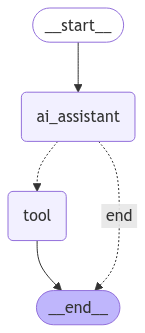

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
for s in app.stream({"messages": ["who is upcoming president of USA?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_rJqIPm8zULfDcA5Pc1usgSfn', 'function': {'arguments': '{"query":"upcoming president of USA 2024"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 76, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_5f20662549', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0bc3f188-d9cb-49a9-9628-1c0966869c16-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA 2024'}, 'id': 'call_rJqIPm8zULfDcA5Pc1usgSfn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 76, 'output_tokens': 21, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'o

In [39]:
for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6bqvGzeSMdtB6z3kO8AhJidg', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 79, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_5f20662549', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b95f0714-d8ed-41e9-9a9d-5a46a1937519-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_6bqvGzeSMdtB6z3kO8AhJidg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 79, 'output_tokens': 20, 'total_tokens': 99, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.

In [40]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [41]:
tavily=TavilySearchResults()

In [42]:
tools = [tavily]

In [43]:
llm_with_tools = llm.bind_tools(tools)

In [44]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [45]:
memory = MemorySaver()

In [46]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [47]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [48]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

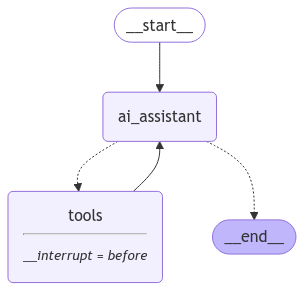

In [49]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [50]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "2"}}

In [51]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [52]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_xig9rZKa5n5uuT5JA3qURGz4)
 Call ID: call_xig9rZKa5n5uuT5JA3qURGz4
  Args:
    query: current capital of India


In [53]:
snapshot = app2.get_state(config)

In [54]:
snapshot.next

('tools',)

In [55]:
last_message=snapshot.values["messages"][-1]

In [56]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current capital of India'},
  'id': 'call_xig9rZKa5n5uuT5JA3qURGz4',
  'type': 'tool_call'}]

In [57]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [58]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()
     

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_xig9rZKa5n5uuT5JA3qURGz4)
 Call ID: call_xig9rZKa5n5uuT5JA3qURGz4
  Args:
    query: current capital of India
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://currentaffairs.adda247.com/states-and-capitals/", "content": "New Delhi, located in the National Capital Territory of Delhi, serves as the administrative, political, and cultural capital of India. The states and capitals of India form a vibrant tapestry, reflecting the nation's diversity in culture, traditions, and innovation. Exploring these regions is a journey of discovery, bridging the ancient and"}, {"url": "https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India", "content": "List of state and union territory capitals in India - Wikipedia List of state and union territory capitals in India 

In [67]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "2"}}

In [68]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [69]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_OgSB5UsLLN0ahpknZz5dWkPJ)
 Call ID: call_OgSB5UsLLN0ahpknZz5dWkPJ
  Args:
    query: current weather in New Delhi


In [70]:
snapshot = app2.get_state(config)

In [71]:
snapshot.next

('tools',)

In [72]:
last_message=snapshot.values["messages"][-1]

In [73]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'current weather in New Delhi'},
  'id': 'call_OgSB5UsLLN0ahpknZz5dWkPJ',
  'type': 'tool_call'}]

In [74]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [75]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()
     

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_OgSB5UsLLN0ahpknZz5dWkPJ)
 Call ID: call_OgSB5UsLLN0ahpknZz5dWkPJ
  Args:
    query: current weather in New Delhi
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'New Delhi', 'region': 'Delhi', 'country': 'India', 'lat': 28.6, 'lon': 77.2, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1735382907, 'localtime': '2024-12-28 16:18'}, 'current': {'last_updated_epoch': 1735382700, 'last_updated': '2024-12-28 16:15', 'temp_c': 20.5, 'temp_f': 68.8, 'is_day': 1, 'condition': {'text': 'Light rain shower', 'icon': '//cdn.weatherapi.com/weather/64x64/day/353.png', 'code': 1240}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 121, 'wind_dir': 'ESE', 'pressure_mb': 1016.0, 'pressure_in': 30.01, 'precip_mm': 0.36, 'precip_in': 0.01, 'h

In [76]:
app2.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of india?', additional_kwargs={}, response_metadata={}, id='a9e19d50-e485-4109-a69b-6db80c622147'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xig9rZKa5n5uuT5JA3qURGz4', 'function': {'arguments': '{"query":"current capital of India"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 87, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9faba9f038', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-46352e9c-930a-4392-ad4e-6a3741e8847b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'current capital of India'

In [77]:
snapshot=app2.get_state(config)

In [78]:
snapshot.next

()

In [103]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "4"}}

In [104]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [105]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

give me the recent news of it?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_abn2P8k88edzB4VYLzS1gUs4)
 Call ID: call_abn2P8k88edzB4VYLzS1gUs4
  Args:
    query: recent news IT industry


In [106]:
snapshot=app2.get_state(config)

In [107]:
current_message = snapshot.values["messages"][-1]

In [108]:
current_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_abn2P8k88edzB4VYLzS1gUs4)
 Call ID: call_abn2P8k88edzB4VYLzS1gUs4
  Args:
    query: recent news IT industry


In [109]:
current_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent news IT industry'},
  'id': 'call_abn2P8k88edzB4VYLzS1gUs4',
  'type': 'tool_call'}]

In [110]:
tool_call_id = current_message.tool_calls[0]["id"]

In [111]:
tool_call_id

'call_abn2P8k88edzB4VYLzS1gUs4'

In [112]:
from langchain_core.messages import AIMessage, ToolMessage

In [113]:
answer = "it is just related to raining which is happing on daily basis"

In [114]:
new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [115]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '4',
  'checkpoint_ns': '',
  'checkpoint_id': '1efc50a0-e0c6-6255-8002-95636a1fb84f'}}

In [116]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={}, id='c5a61580-1470-4d99-8af1-3da9a72e15fc')]
